In [1]:
from data_cleaning_coral.data_cleaning_class import MedicalDataProcessor
from Neo4jDatabase.Neo4jDatabase_class import Neo4jDatabase
from llm_models.llm_model_class import LLM_Models
from ablation_study.ablation_study_class import AblationEval
from stability_evaluation.stability_evaluation_class import StabilityEval
from robustness_evaluation.robustness_evaluation_class import RobustnessEval
from readability_evaluation.readability_evaluation_class import ReadabilityEval
import pandas as pd
from config import config

## Initialize Model and Data Cleaning Processor

In [2]:
# Initialize the LLM model 
llm_model = LLM_Models()
# Initialize the MedicalDataProcessor instance
processor = MedicalDataProcessor(llm_model)
# Cleaning the raw EHR data
processor.orchestrator()

## Import to Neo4J Local Database

In [3]:
database = Neo4jDatabase(
        uri=config["db_uri"],
        user=config["db_user"],
        password=config["db_password"]
    )
# Upload to Neo4j Database
database.db_creation_orchestrator(
    df_patients=processor.final_data["patient"],
    df_admission=processor.final_data["admission"],
    df_symptoms=processor.final_data["symptoms"],
    df_history=processor.final_data["history"],
    df_allergies=processor.final_data["allergies"],
    df_social_history=processor.final_data["social_history"],
    df_family_history=processor.final_data["family_history"]
)

## QA set for Evaluation

In [4]:
QAset = pd.read_csv("/Users/huiziyu/Dropbox/AIPatient_OOD/data/clean_data/QA_set.csv")# 

# Begin Ablation Study

In [6]:
ablation_study = AblationEval(database, llm_model, QAset)
ablation_study.orchestrator()
ablation_study.evaluator()

/Users/huiziyu/Dropbox/AIPatient_OOD/code/ablation_study/ablation_study_class.py:147: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('Question Category')['Final_Answer']
/Users/huiziyu/Dropbox/AIPatient_OOD/code/ablation_study/ablation_study_class.py:152: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivoted = proportion_true_by_category.pivot_table(index=None, columns='Question Category', values='Proportion Correct').reset_index(drop=True)
/Users/huiziyu/Dropbox/AIPatient_OOD/code/ablation_study/ablation_study_class.py:153: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivoted = pivoted

Question Category,Admission,Patient,Symptom,Medical History,Allergy,Family and Social History,Overall,Fewshot,Retrieval Agent,Abstraction Agent
0,100.00%,100.00%,100.00%,71.55%,100.00%,62.40%,81.04%,True,True,True
1,66.25%,100.00%,93.33%,66.38%,50.00%,61.60%,72.04%,True,True,False
2,67.50%,100.00%,100.00%,41.38%,83.33%,64.00%,66.82%,True,False,True
3,75.00%,100.00%,100.00%,32.76%,100.00%,61.60%,65.40%,True,False,False
4,63.75%,71.25%,66.67%,56.03%,66.67%,60.00%,62.09%,False,True,True
5,78.75%,95.00%,60.00%,57.76%,33.33%,61.60%,69.67%,False,True,False
6,66.25%,95.00%,80.00%,37.07%,100.00%,61.60%,63.27%,False,False,True
7,75.00%,86.25%,80.00%,28.45%,33.33%,63.20%,60.43%,False,False,False


## Begin Stability Evaluation

In [7]:
stability_evaluation = StabilityEval(database, llm_model, QAset)
stability_evaluation.orchestrator()
stability_evaluation.evaluator()

Overall ANOVA Results:
              sum_sq      df         F    PR(>F)
C(Group)    0.295491     3.0  0.592403  0.620005
Residual  256.383035  1542.0       NaN       NaN


## Begin Robustness Evaluation

In [8]:
robustness_evaluation = RobustnessEval(database, llm_model, QAset)
robustness_evaluation.orchestrator()
robustness_evaluation.evaluator()

({'Personality_1': 0.9764705882352941,
  'Personality_2': 0.9647058823529412,
  'Personality_3': 1.0,
  'Personality_4': 0.9529411764705882,
  'Personality_5': 0.9764705882352941,
  'Personality_6': 0.9529411764705882,
  'Personality_7': 0.9764705882352941,
  'Personality_8': 0.9529411764705882,
  'Personality_9': 0.9411764705882353,
  'Personality_10': 0.9647058823529412,
  'Personality_11': 0.9764705882352941,
  'Personality_12': 0.9529411764705882,
  'Personality_13': 0.9647058823529412,
  'Personality_14': 0.9529411764705882,
  'Personality_15': 0.9764705882352941,
  'Personality_16': 0.9411764705882353,
  'Personality_17': 0.9529411764705882,
  'Personality_18': 0.9764705882352941,
  'Personality_19': 0.9647058823529412,
  'Personality_20': 0.9529411764705882,
  'Personality_21': 0.9411764705882353,
  'Personality_22': 0.9764705882352941,
  'Personality_23': 0.9647058823529412,
  'Personality_24': 0.9411764705882353,
  'Personality_25': 0.9647058823529412,
  'Personality_26': 0.97

## Begin Readability Evaluation

Flesch Reading Ease Summary: {'Min': 6.17, 'Q1': 62.68, 'Median': 70.6, 'Q3': 79.26, 'Max': 119.19}
Flesch-Kincaid Grade Level Summary: {'Min': 0.1, 'Q1': 5.2, 'Median': 6.8, 'Q3': 8.2, 'Max': 19.0}


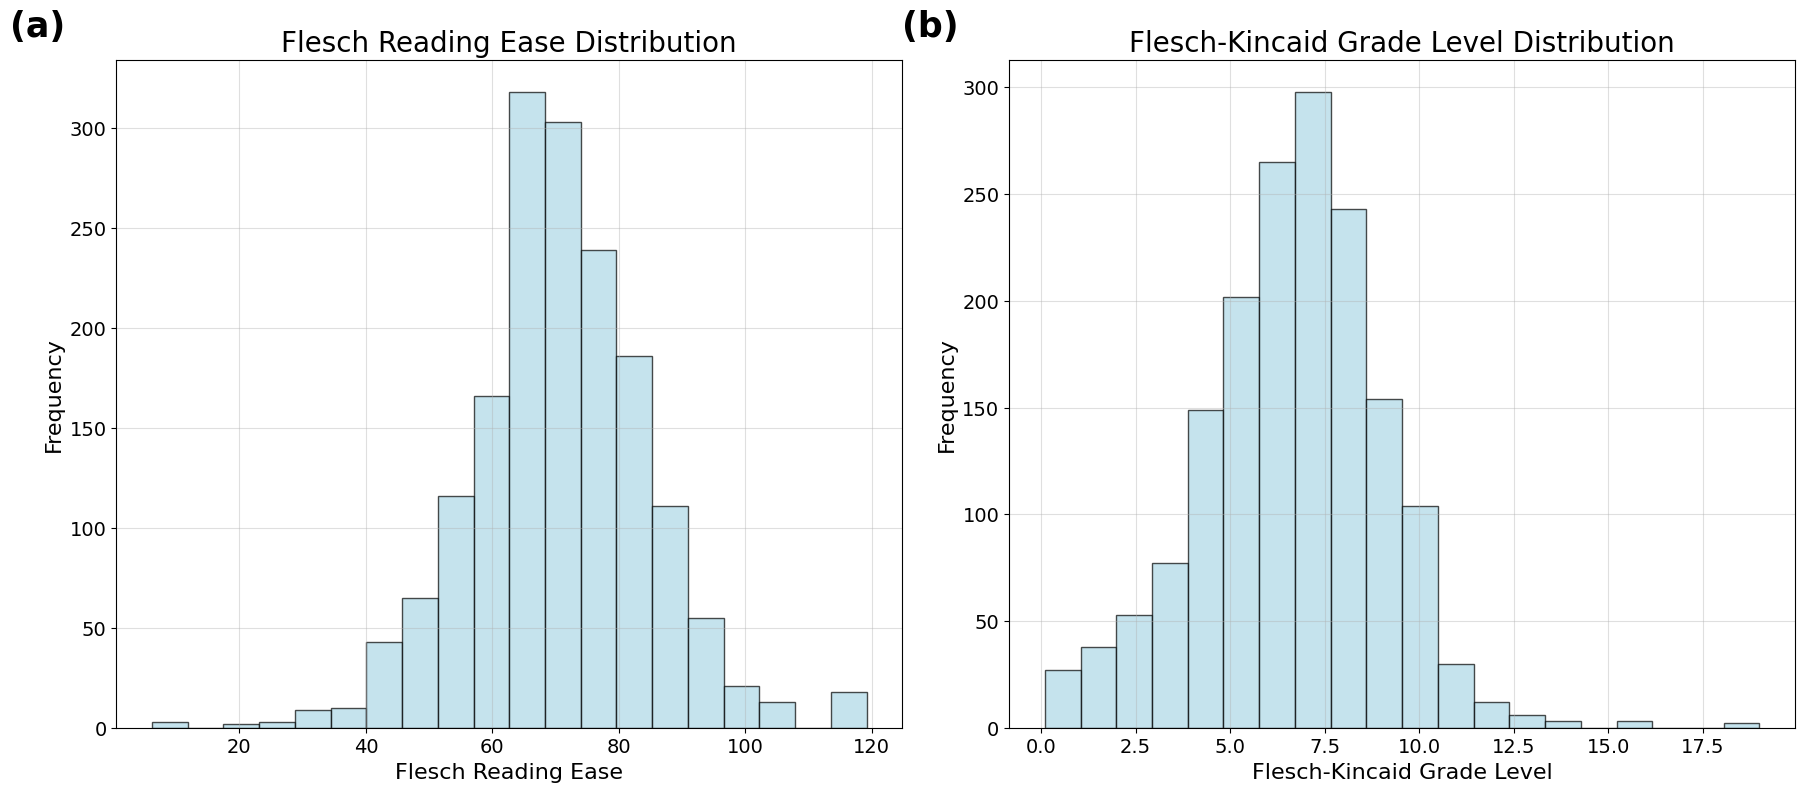

In [9]:
readability_evaluation = ReadabilityEval(database, llm_model, QAset)
readability_evaluation.orchestrator()
readability_evaluation.evaluator()